<a href="https://www.kaggle.com/code/jyotsnacd/coffee-quality-brew-data-cleaning-visualization?scriptVersionId=133718499" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 50)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from scipy import stats
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv


**Loading Data and checking samples**

In [2]:
filepath = "/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv"
df = pd.read_csv(filepath)
df.head(3)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


In [3]:
# making ID as DF index and removing Unnamed columns
df.set_index("ID",inplace = True)
df.drop("Unnamed: 0",axis=1,inplace=True)


In [4]:
#Let's all see how categorical variales are loooking
df.describe(include="object")

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Color,Expiration,Certification Body,Certification Address,Certification Contact
count,207,205,206,204,75,207,206,205,206,207,207,207,207,207,201,207,202,207,207,207,207,207
unique,22,172,187,162,67,72,97,120,172,39,21,7,75,80,48,1,10,12,75,21,21,21
top,Taiwan,Doi Tung Development Project,1,Dry Mill,non,Taiwan Coffee Laboratory,1200,Chiayi,Doi Tung Development Project,30 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Caturra,Completed,Washed / Wet,green,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
freq,61,7,11,11,5,51,23,12,7,39,83,99,40,30,27,207,124,101,40,83,83,83


###  Observations
1. The columns "Company" and "Owner" provide redundant information, with the additional inclusion of Chinese names in the "Owner" column. Therefore,   it is safe to remove the "Owner" column from the dataset. <br>
2. Bag weight seems to be numeric."kg" suffix need to be removed and data type should be changed it float  <br>
3. ["Producer","In-Country Partner","Certification Body","Farm Name","Mill","Region"] have some chinese character. They need cleaning.<br>
4. "Status" column has no information. So we can drop it.<br>
5. "Grading Date","Expiration","Harvest Year" need to be converted in Date Format.<br>
6. "Certification Address" and "Certification Contact" can be deleted as we have region column and contact person seems irrelevant here.<br>
7. "Harvest Year" sometimes have values in the form of ranges. We can keep the first value in order to have the values of columns as a single year.<br>
8. As we can see that more than half of ICO Number is Null, so we can straightaway drop the column.


In [5]:
#removing columns "Owner", "Certification Address", "Certification Contact", "Status"
try:
    df.drop(["Owner", "Certification Address", "Certification Contact", "Status","Lot Number","ICO Number"],axis=1, inplace=True)
except KeyError:
    pass

# removing kg from Bag weight column and converting to int dtype
try:
    df["Bag Weight"] = df["Bag Weight"].apply(lambda x: x.split(" ")[0]).astype("int64")
except AttributeError:
    pass

# removing chinese character from "In-company Partner" and "Producer"
import re 
#to extract only english characters
def extract_eng_char(s):
    s = str(s)
    s = re.sub(r'[^a-zA-Z0-9\s]', '', s).strip()
    return s

columns_with_noneng = ["Producer","In-Country Partner","Certification Body","Farm Name","Mill","Region"]
for col in columns_with_noneng:
    df[col] = df[col].apply(extract_eng_char)
    #Set unknown as producer for empty strings
    df[col] = df[col].replace("","unknown")


#let's keep a copy of df so far
df_1 = df.copy()

#"Expiration" needs to be converted in Date Format.
date_cols = ["Grading Date","Expiration"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col])
    
#Keeping first value of harvest value
df["Harvest Year"] = df["Harvest Year"].apply(lambda x: x.strip().split("/")[0].strip() if "/" in x.strip() else x.strip())
df["Harvest Year"] = pd.to_datetime(df["Harvest Year"],format="%Y")




* Let's see all the numerical and categorical columns

In [6]:
#drop columns with unique value = 1
cols_to_drop = df.columns[df.nunique()==1]
df.drop(cols_to_drop,axis=1, inplace = True)

In [7]:
df.describe(include="object")

,Country of Origin,Farm Name,Mill,Company,Altitude,Region,Producer,In-Country Partner,Variety,Processing Method,Color,Certification Body
count,207,207,207,207,206,207,207,207,201,202,207,207
unique,22,133,123,72,97,115,124,21,48,10,12,21
top,Taiwan,unknown,unknown,Taiwan Coffee Laboratory,1200,unknown,unknown,Taiwan Coffee Laboratory,Caturra,Washed / Wet,green,Taiwan Coffee Laboratory
freq,61,44,42,51,23,27,52,83,27,124,101,83


**Observations in Categorical Columns**
* Among all, we can observe that ["Farm Name", "Mill", "Region", "Producer"] have majority values as unknown. However, let's not discard it right away.
* Except for Color and Processing Methods, there seems to be too many categories of each column. We can later check if we can merge under-represented column values
*Altitude appears to be a numerical column.and there are also some range altitudes. let's take the average and convert the dtype to int right away

In [8]:
#Calculating Average Altitude where range is given
def get_avg_alt(x):
    x = str(x)
    x = re.findall(r'\d+|\D+', x)
    if len(x) ==3:
        return (int(x[0])+int(x[2]))//2
    elif len(x) == 1 and x[0].isdigit():
        return int(x[0])
    else:
        return -1
df["Altitude"] = df["Altitude"].apply(get_avg_alt)

#As we can see "Processing Method", "Variety" have a very few missing values. 
df["Processing Method"] = df["Processing Method"].fillna("Unknown")
df["Variety"] = df["Variety"].fillna("Unknown")

In [9]:
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
non_num_cols = df.select_dtypes(include=['object']).columns
date_cols = df.select_dtypes(include=['datetime64']).columns

print(numerical_cols,end="\n\n")
print(non_num_cols,end="\n\n")
print(date_cols,end="\n")

Index(['Altitude', 'Number of Bags',
       'Bag Weight', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Overall',
       'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers',
       'Category Two Defects'],
      dtype='object')

Index(['Country of Origin', 'Farm Name', 'Mill',
       'Company', 'Region', 'Producer',
       'In-Country Partner', 'Variety',
       'Processing Method', 'Color',
       'Certification Body'],
      dtype='object')

Index(['Harvest Year', 'Grading Date',
       'Expiration'],
      dtype='object')


# Numerical Variables

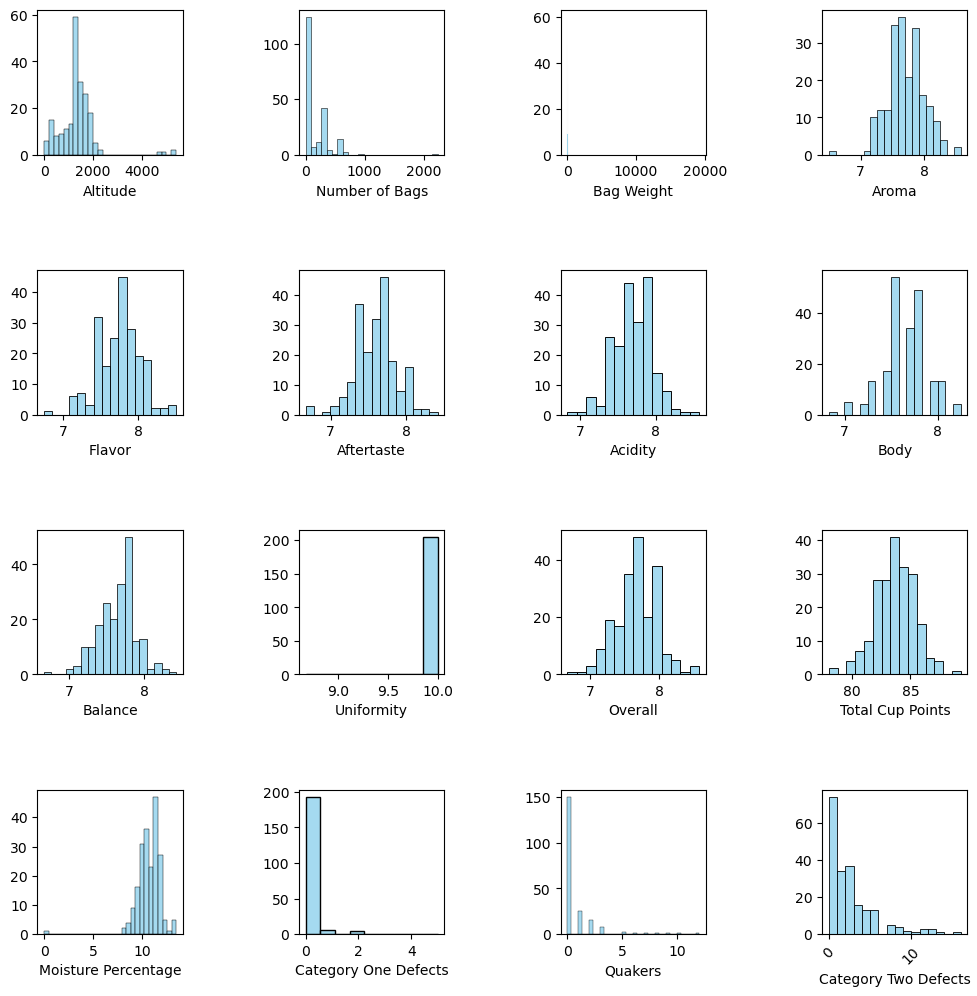

In [10]:
#Visualizing Distributions for numerical coulmns

fig,axs = plt.subplots(4,4,figsize=(12,12))
plt.subplots_adjust(wspace=0.8,hspace=0.8)

for i,col in enumerate(numerical_cols):
    sns.histplot(df[col],color="skyblue", ax = axs[int(i/4),i%4]).set_ylabel("")
plt.xticks(rotation=45)
plt.show()

**Observations:**
* "Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance" and "Total Cups" appear to be normally distributed. We can check for normality test
* "Moisture Percentage" and "Altitude" seem to be normally distributed too except for a few outliers.
* "Category Two defects" are exponential distributed
* "Uniformity" and "Catgory One Defects" have majority as a single value except for a few outliers. So we can discard these columns considering they don't carry any useful information.
* "Bag Weight" seems to have outliers. hence we need to remove them.

In [11]:
#First Let's perform the normality Test ("Shapiro-Wilk Test") to confirm the normality of columns:
#["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance" and "Total Cups"]

cols_to_test = ["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance" and "Total Cup Points", "Moisture Percentage", "Altitude"]

for col in cols_to_test:
    statistic, p_value = stats.shapiro(df[col])
    # Check the p-value
    alpha = 0.05  # Set the significance level
    if p_value > alpha:
        print(f"{col} values are normally distributed (failed to reject H0)",end="\n")
    else:
        print(f"{col} values are not normally distributed (may reject H0)",end="\n")


Aroma values are not normally distributed (may reject H0)
Flavor values are not normally distributed (may reject H0)
Aftertaste values are not normally distributed (may reject H0)
Acidity values are not normally distributed (may reject H0)
Body values are not normally distributed (may reject H0)
Total Cup Points values are normally distributed (failed to reject H0)
Moisture Percentage values are not normally distributed (may reject H0)
Altitude values are not normally distributed (may reject H0)


Results: **None of the above columns follow Normal Distribution except "Total Cup Points"**

In [12]:
# Let's now handle the outliers in the aforementioned columns : "Bag Weight", "Moisture Percentage" and "Altitude"
#Let's replace the outliers with mean values. We can assume lower and upper bound thresholds of outliers as 5th percentile and 95th percentile values

cols_with_outliers = ["Bag Weight", "Moisture Percentage", "Altitude","Aroma","Quakers", "Balance", "Number of Bags"]
for col in cols_with_outliers:
    lower_thresh = np.percentile(df[col],5)
    upper_thresh = np.percentile(df[col],95)
    mean_val = np.mean(df[col])
    df.loc[(df[col] <= lower_thresh) | (df[col] >= upper_thresh), col] = mean_val

#Also, dropping columns "Uniformity" and "Catgory One Defects" since they don't carry any useful info
# df.drop("Uniformity",axis=1,inplace=True)
cols_to_drop = ["Uniformity", "Category One Defects"]
#df.drop("Category One Defects",axis=1,inplace=True)


numerical_cols = numerical_cols[(numerical_cols!="Uniformity") & (numerical_cols!="Category One Defects")]
#numerical_cols.remove(["Category One Defects"],axis=1, inplace=True)
    

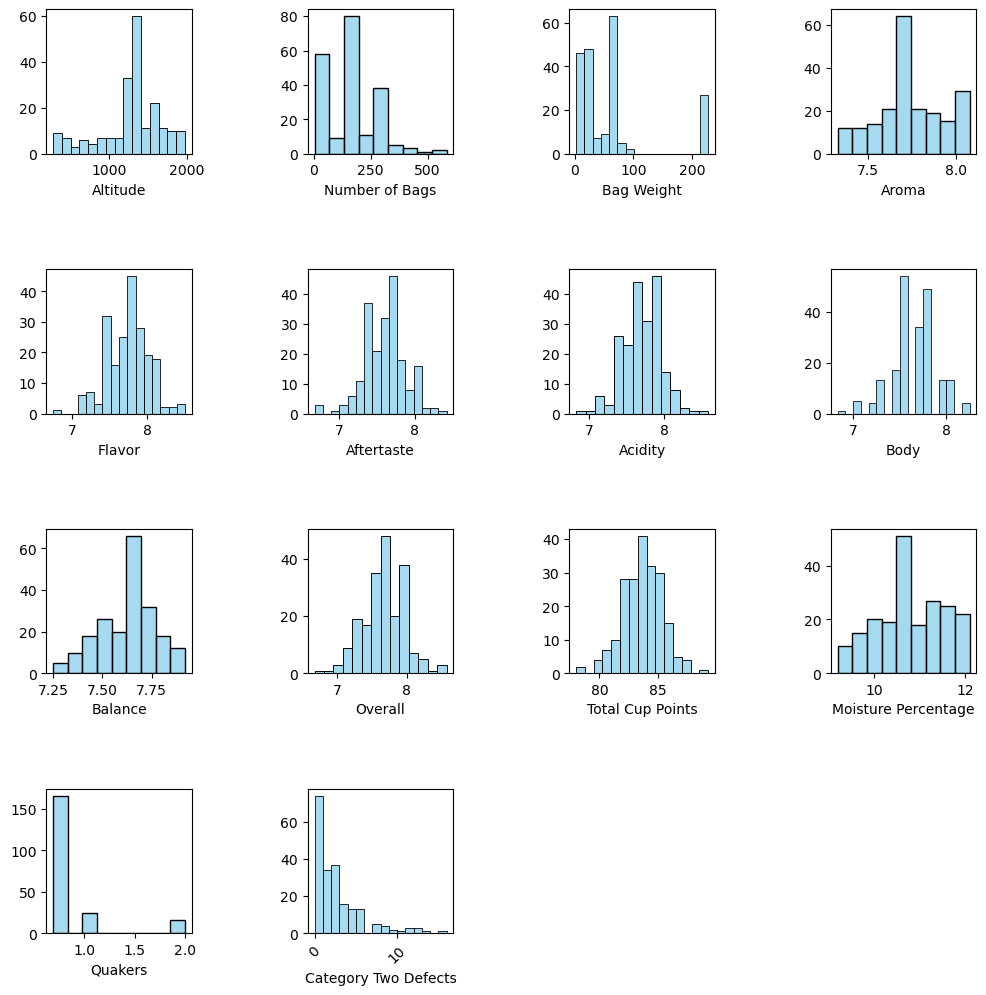

In [13]:
#Visualizing Distributions after handling outliers

fig,axs = plt.subplots(4,4,figsize=(12,12))
plt.subplots_adjust(wspace=0.8,hspace=0.8)

for i,col in enumerate(numerical_cols):
    sns.histplot(df[col],color="skyblue", ax = axs[int(i/4),i%4]).set_ylabel("")
fig.delaxes(axs[3, 2])
fig.delaxes(axs[3, 3])
plt.xticks(rotation=45)
plt.show()

### Pre-processing Catgorical Variables

In [14]:
#Let's check the summary statistics of Categorical variables
df.describe(include="object")

,Country of Origin,Farm Name,Mill,Company,Region,Producer,In-Country Partner,Variety,Processing Method,Color,Certification Body
count,207,207,207,207,207,207,207,207,207,207,207
unique,22,133,123,72,115,124,21,49,11,12,21
top,Taiwan,unknown,unknown,Taiwan Coffee Laboratory,unknown,unknown,Taiwan Coffee Laboratory,Caturra,Washed / Wet,green,Taiwan Coffee Laboratory
freq,61,44,42,51,27,52,83,27,124,101,83


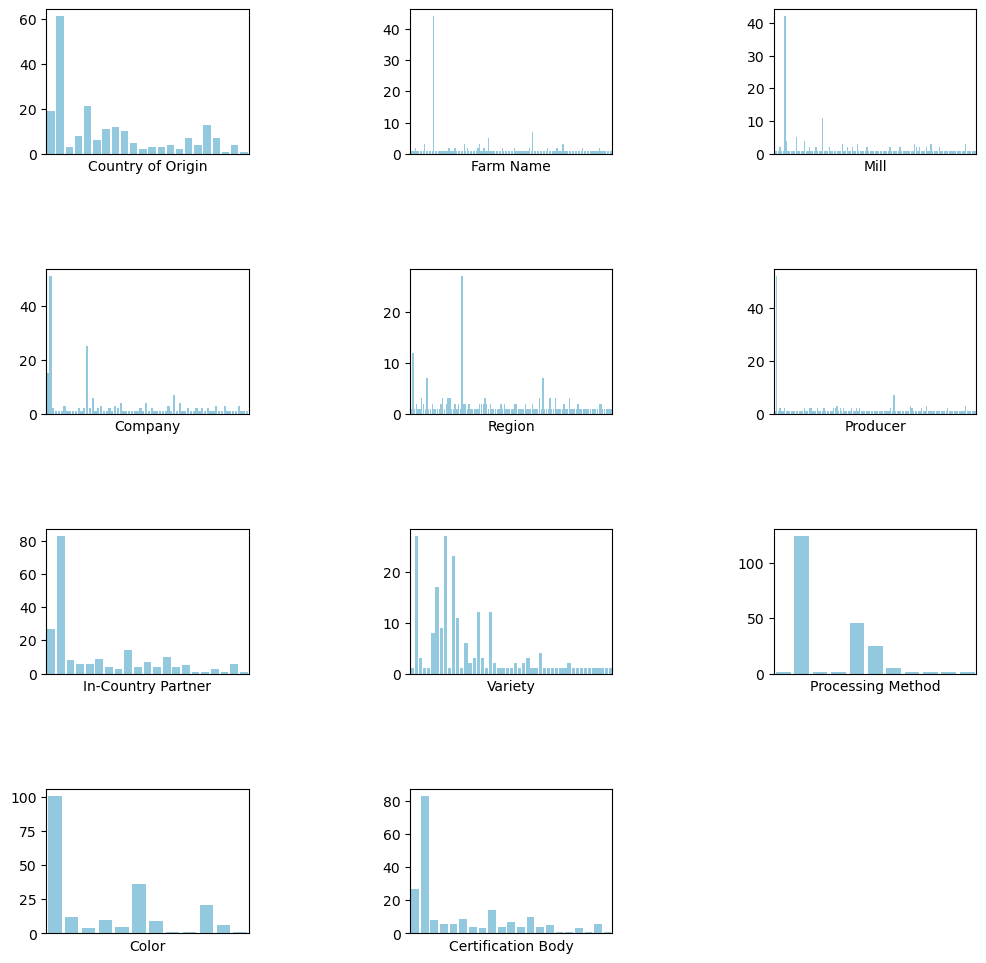

In [15]:
#Categorical Variables Distribution
fig,axs = plt.subplots(4,3,figsize=(12,12))
plt.subplots_adjust(wspace=0.8,hspace=0.8)

for i,col in enumerate(non_num_cols):
    sns.countplot(x=col,data=df,color="skyblue", ax = axs[int(i/3),i%3]).set_ylabel("")
    
    
# Hide x-ticks for each subplot
for ax in axs.flat:
    ax.set_xticks([])
fig.delaxes(axs[3, 2])
plt.xticks([])
plt.show()




**Observations:**
* Each of the Categorical Variable has one or two dominating values  while the other values represent a smaller proportion of data.
* "Farmname", "Mill", "Region" and "Producer" have missing values/chinese characters which we had replaced with "Unknown" earlier while cleaning the data
* We can combine the minority elements into a single category value in the columns where data is highly imbalanced, or we can also consider setting a lower threshold count to combine categories

In [16]:
#Combining categories for each column where represent less than 10% of datapoints
threshold = 5
for col in non_num_cols:
    col_freq = df[col].value_counts()
    to_be_changed = col_freq[col_freq<5].index
    df[col] = df[col].replace(to_be_changed,"Others")
    
    

/tmp/ipykernel_32/3867386172.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=5)


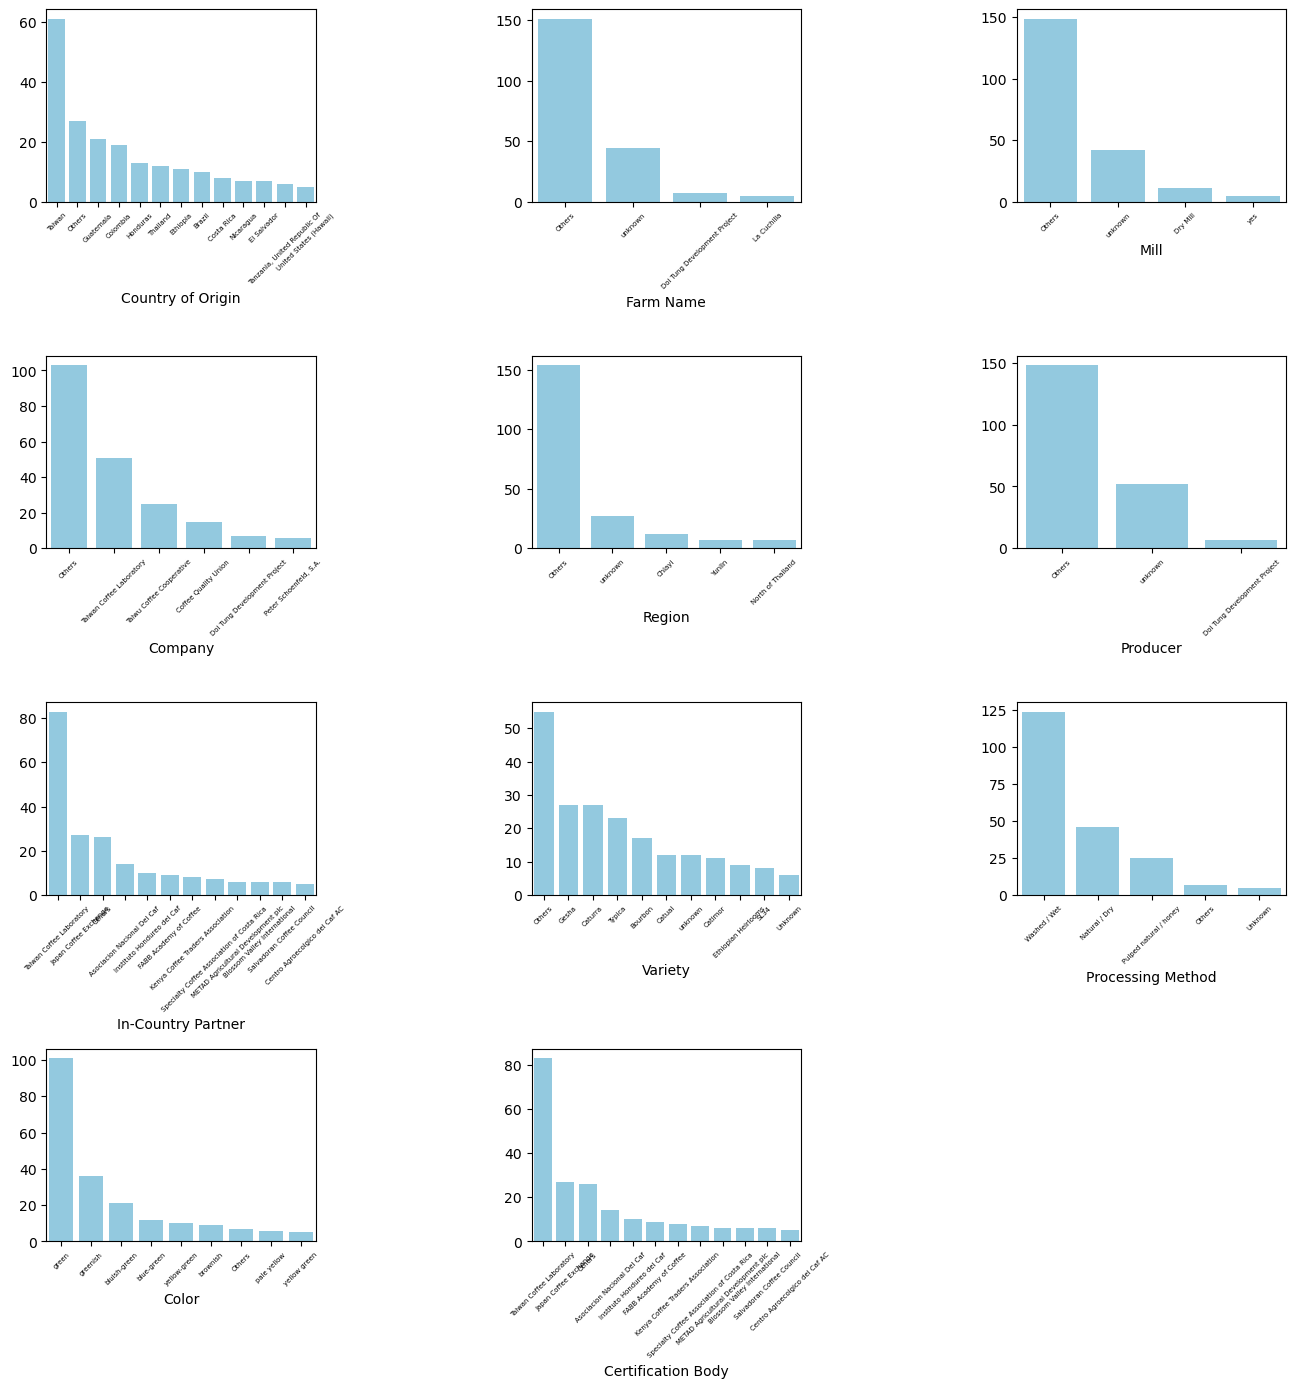

In [17]:
#Categorical Variables Distribution
fig,axs = plt.subplots(4,3,figsize=(16,16))
plt.subplots_adjust(wspace=0.8,hspace=0.8)

for i,col in enumerate(non_num_cols):
    cat_sorted = df[col].value_counts().index
    sns.countplot(x=col,data=df,color="skyblue", ax = axs[int(i/3),i%3], order = cat_sorted ).set_ylabel("")
    
    
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=5)
    
fig.delaxes(axs[3, 2])
plt.show()

<Axes: >

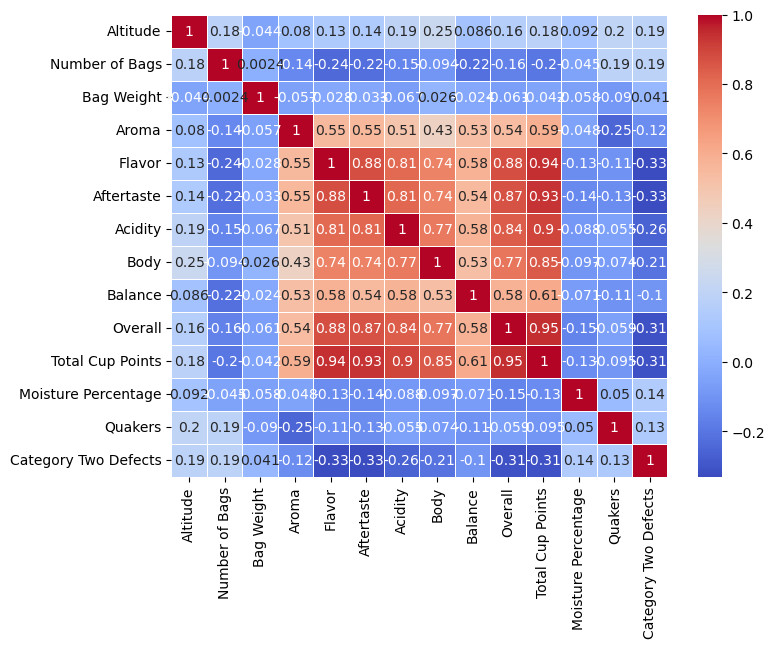

In [18]:
#Visualizing the correlation between numerical features
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

### Observations:
* It is evident that there exists a strong correlation among the properties that define the quality of coffee.
* By examining the correlation between "Total Cup Points" and various characteristics of coffee, we can gain insights into the relative importance assigned to each quality test when determining the points for the overall quality evaluation.

# Conclusion: <br>
**1. The dataset offers a comprehensive overview of the necessary data for analyzing coffee quality, encompassing all relevant coffee properties and   their correlations, thereby providing a holistic perspective.** <br>
**2. The categorical columns in the dataset exhibit a significant imbalance, with a small number of values dominating the majority of data points.**<br>
**3. After performing the Shapiro-Wilk test, it was found that only the "Total Cup Points" column follows a normal distribution, while the other numerical columns deviate from normality even though they look approximately normal.**<br>
**4. It is necessary to address outliers and perform data cleaning for the numerical columns.**<br>
**5. Certain columns, such as "Uniformity" and "Category One Defects," contain only a single value with some outliers, making them uninformative. As a result, these columns can be safely discarded from the analysis.**<br>



*PS - If you appreciate the work in my notebook, I kindly request you to consider upvoting it. Your support would be greatly appreciated. Thank you!*